# This notebook to apply some causal inferencial methods data of Direct acyclic graph (DAG)

In [ ]:
##install necessary packages
#install.packages("sem")
#install.packages("meta")
#install.packages("igraph")

In [1]:
library(sem)

In [2]:
library(meta)

Loading required package: metadat

Loading 'meta' package (version 7.0-0).
Type 'help(meta)' for a brief overview.
Readers of 'Meta-Analysis with R (Use R!)' should install
older version of 'meta' package: https://tinyurl.com/dt4y5drs



In [3]:
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




## Five different models of DAG are applied on simulated data representing OMICS data. S represents the SNP genotype data which can represent 0,1,2. G represents the quantitative trait such as gene expression or any other traits that related with SNP. P is the phenotype. The below graphs are the cases we considered in the applications.

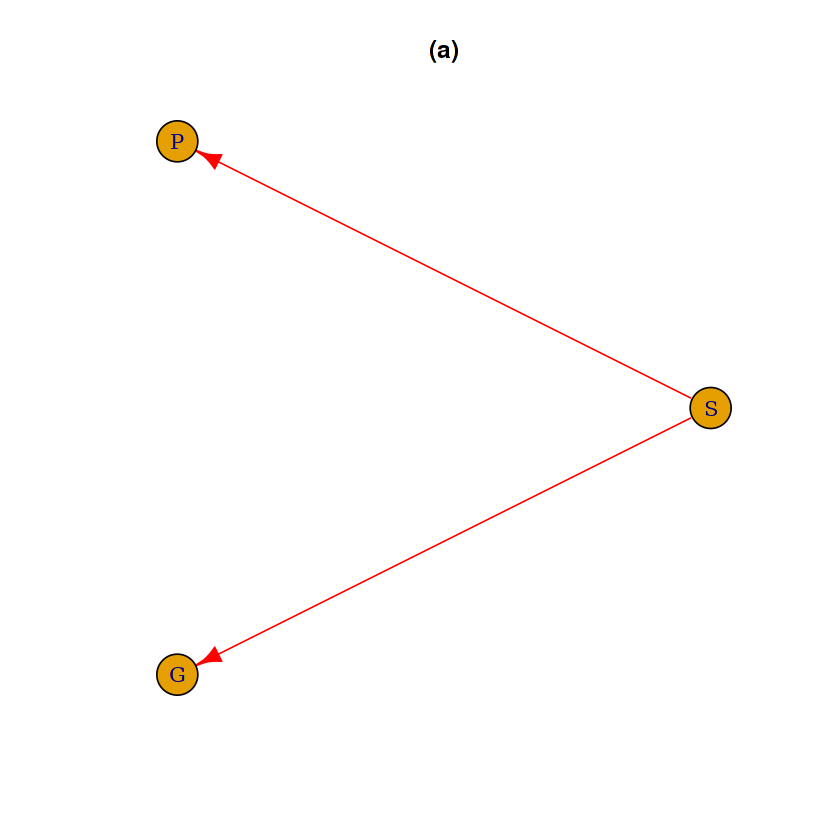

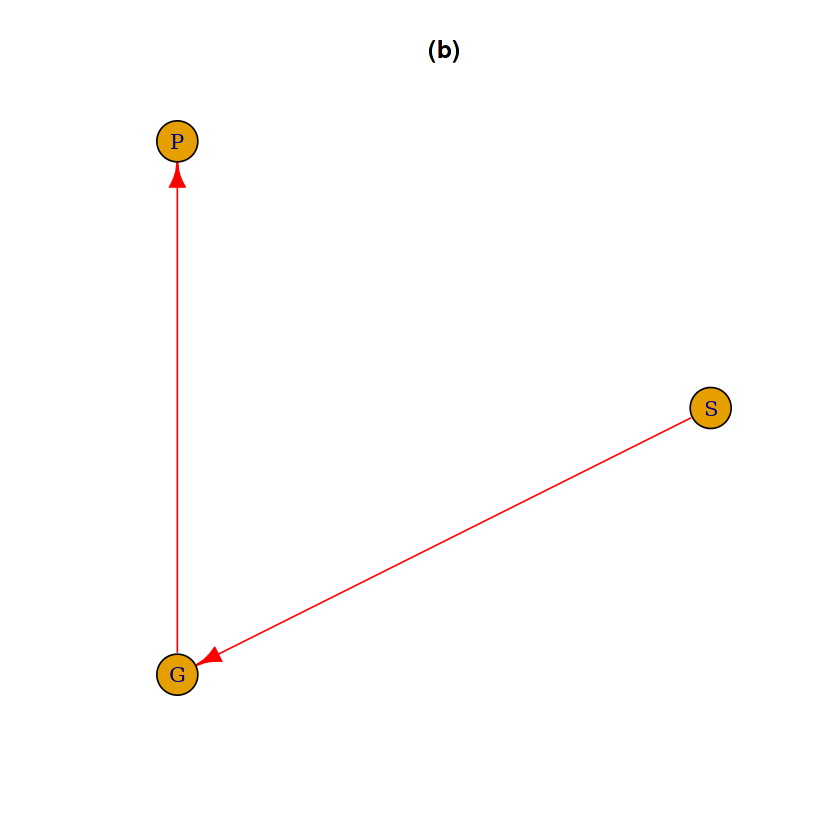

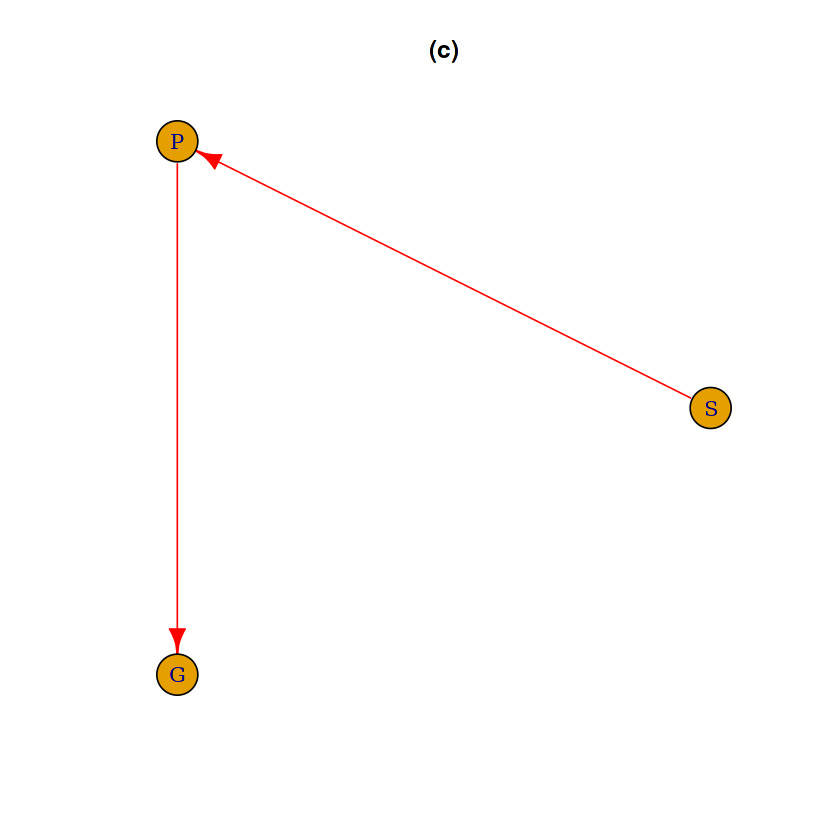

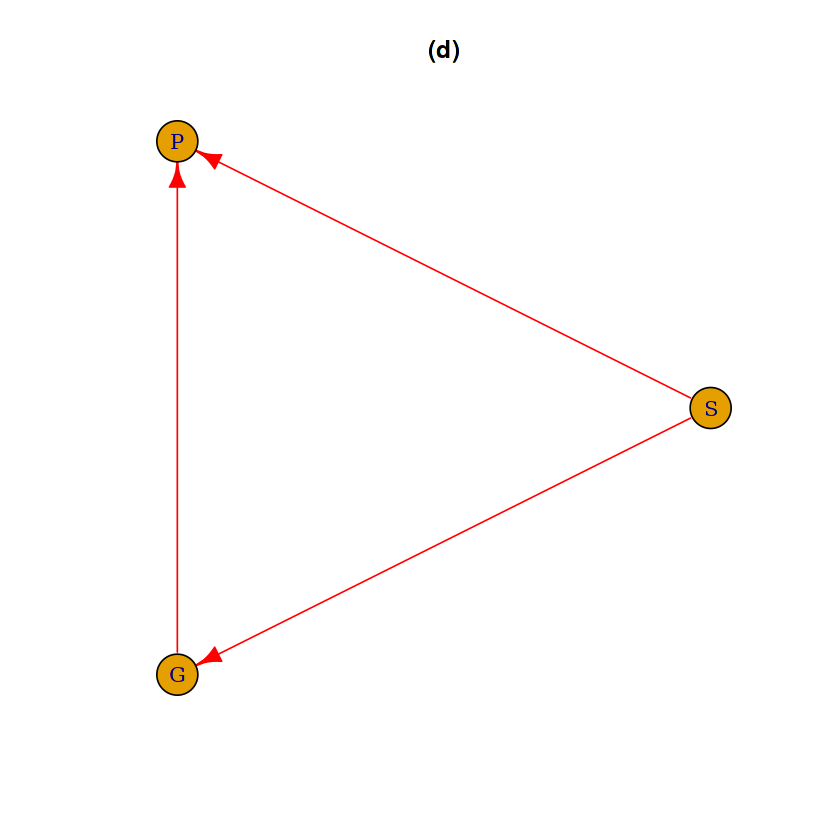

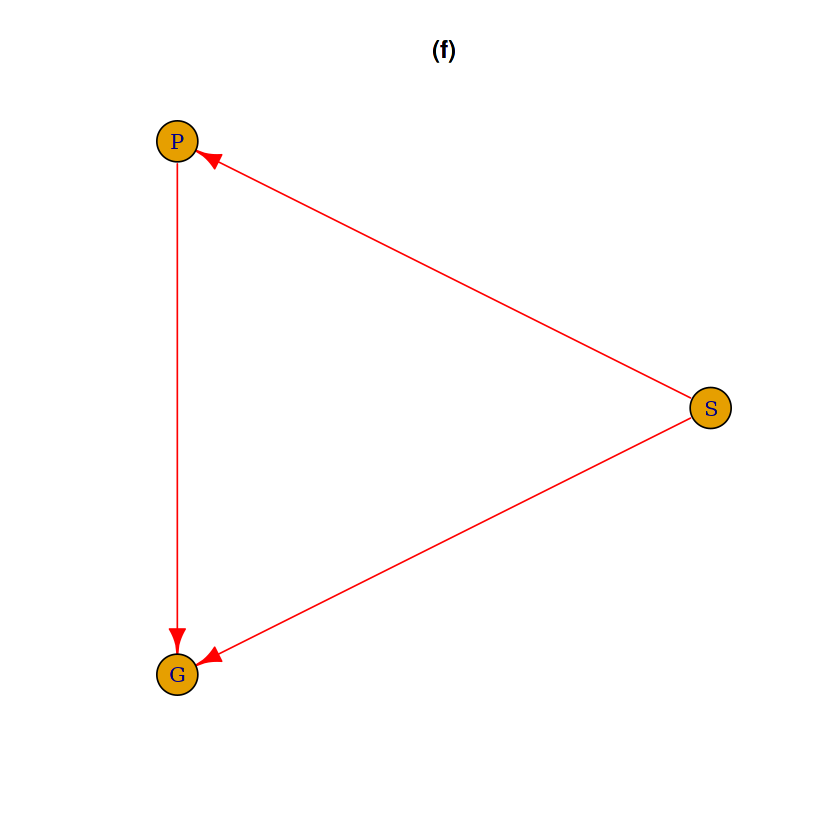

In [33]:
# DAG type a
g <- make_empty_graph() + vertices(c("S","P","G"))
g <- g + path(c("S","P"), color = "red")
g <- g + path(c("S","G"), color = "red")
plot(g, layout=layout.circle, main = "(a)")
# DAG type b
g <- make_empty_graph() + vertices(c("S","P","G"))
g <- g + path(c("S","G"), color = "red")
g <- g + path(c("G","P"), color = "red")
plot(g, layout=layout.circle, main = "(b)")
# DAG type c
g <- make_empty_graph() + vertices(c("S","P","G"))
g <- g + path(c("S","P"), color = "red")
g <- g + path(c("P","G"), color = "red")
plot(g, layout=layout.circle, main = "(c)")
# DAG type d
g <- make_empty_graph() + vertices(c("S","P","G"))
g <- g + path(c("S","P"), color = "red")
g <- g + path(c("S","G"), color = "red")
g <- g + path(c("G","P"), color = "red")
plot(g, layout=layout.circle, main = "(d)")
# DAG type f
g <- make_empty_graph() + vertices(c("S","P","G"))
g <- g + path(c("S","P"), color = "red")
g <- g + path(c("S","G"), color = "red")
g <- g + path(c("P","G"), color = "red")
plot(g, layout=layout.circle, main = "(f)")


## The first method is Structural Equation Models (SEM) 
### Fox, J. (2006) Structural equation modeling with the sem package in R. Structural Equation Modeling 13:465–486.
### Bollen, K. A. (1989) Structural Equations With Latent Variables. Wiley.

In [35]:

alph<-1;bett<-1;delt<-1
mug<-10;mup<-10;gam<-1;zet<-1
sigg<-0.3;sigp<-0.3;sige<-0.3;bet<-1

par<-function(y){
if (y=="a"){u1<-c(1,1,0,0);u2<-c(1,1,0,0)}
else if (y=="b"){u1<-c(1,1,0,0);u2<-c(1,0,1,0)}
else if (y=="c"){u1<-c(1,0,1,0);u2<-c(1,1,0,0)}
else if (y=="d"){u1<-c(1,1,0,0);u2<-c(1,1,1,0)}
else if (y=="f"){u1<-c(1,1,1,0);u2<-c(1,0,0,0)}
uu<-rbind(u1,u2)
return (uu)
}




mer<-function(v1,v2) paste(c(as.character(v1),as.character(v2)),collapse="")
genr<-function(count,maf){
a<-rbinom(count,1,1-maf)
b<-rbinom(count,1,1-maf)
d<-c()
for (i in 1:count){d<-cbind(d,mer(a[i],b[i]))}
s<-d
for (i in 1:count){
 if (s[i]=="00"){s[i]<-"2"}
else if (s[i]=="11"){s[i]<-"0"}
else {s[i]<-"1"}}
return(s)
}




datset<-function(z,u){
  A<-par(u)
  g<-c();p<-c();ee<-c();SS<-c()
  for (i in 1:length(z)){
 if (A[1,4]==0){E<-0}
  else {E<-rnorm(1,0,0.09)}
  sv<-as.numeric(z[i])
  G<-0;P<-0
  if (A[2,3]==1){
  G<-rnorm(1,A[1,1]*mug+alph*A[1,2]*sv+delt*A[1,3]*P+zet*A[1,4]*E,0.09)
  P<-rnorm(1,A[2,1]*mup+bet*A[2,2]*sv+gam*A[2,3]*G+zet*A[2,4]*E,0.09)
  }
  else if (A[1,3]==1){
  P<-rnorm(1,A[2,1]*mup+bet*A[2,2]*sv+gam*A[2,3]*G+zet*A[2,4]*E,0.09)
  G<-rnorm(1,A[1,1]*mug+alph*A[1,2]*sv+delt*A[1,3]*P+zet*A[1,4]*E,0.09)
  }
  else {
  P<-rnorm(1,A[2,1]*mup+bet*A[2,2]*sv+gam*A[2,3]*G+zet*A[2,4]*E,0.09)
  G<-rnorm(1,A[1,1]*mug+alph*A[1,2]*sv+delt*A[1,3]*P+zet*A[1,4]*E,0.09)
  }
  SS<-cbind(SS,round(sv))
  g<-cbind(g,round(G,digits = 4))
  p<-cbind(p,round(P,digits = 4))
  ee<-cbind(ee,round(E,digits = 4))
  }
  SET<-as.array(SS,dim=c(1,length(SS)))
  SET<-rbind(SET,g)
  SET<-rbind(SET,p)
  SET<-rbind(SET,ee)
  #matrix(c(SS,g,p,ee),nrow=4,ncol=length(SS),byrow=T)
  rownames(SET)<-c("S","G","P","E")
 SET<-t(SET)
  return (SET)
  }





readcov<- function(xx){
te<-c("")
cols<-colnames(xx)
for (i in 1:length(xx[1,])){
for (j in 1:length(xx[,1])){
if (j<=i){te<-paste(te,as.character(xx[i,j]),collapse="")}
if (j==i && j!=length(xx[1,])){te<-paste(te,"\n",collapse="")}
}}
return(te)
}


speciEq<-function(ZZ){
eqtext<-c("")
if (ZZ[2,3]==0 && ZZ[1,3]==1){
if (ZZ[2,2]==1){eqtext<-paste(eqtext,"P=bett*S\n")}
if (ZZ[2,4]==1){eqtext<-paste(eqtext,"P=zett*E\n")}
if (ZZ[1,2]==1){eqtext<-paste(eqtext,"G=alphh*S\n")}
eqtext<-paste(eqtext,"G=deltt*P\n")
if (ZZ[1,4]==1){eqtext<-paste(eqtext,"G=zett*E\n")}
}
if (ZZ[1,3]==0 && ZZ[2,3]==1){
if (ZZ[1,2]==1){eqtext<-paste(eqtext,"G=alphh*S\n")}
if (ZZ[1,4]==1){eqtext<-paste(eqtext,"G=zett*E\n")}
if (ZZ[2,2]==1){eqtext<-paste(eqtext,"P=bett*S\n")}
eqtext<-paste(eqtext,"P=gamm*G\n")
if (ZZ[2,4]==1){eqtext<-paste(eqtext,"P=zett*E\n")}
}
if (ZZ[1,3]==0 && ZZ[2,3]==0 && ZZ[1,1]!=0 && ZZ[2,1]!=0){
if (ZZ[1,2]==1){eqtext<-paste(eqtext,"G=alphh*S\n")}
if (ZZ[1,4]==1){eqtext<-paste(eqtext,"G=zett*E\n")}
if (ZZ[2,2]==1){eqtext<-paste(eqtext,"P=bett*S\n")}
if (ZZ[2,4]==1){eqtext<-paste(eqtext,"P=zett*E\n")}
}
if (ZZ[1,1]==0 && ZZ[2,2]==1){eqtext<-paste(eqtext,"P=bett*S\n")}
if (ZZ[2,1]==0 && ZZ[1,2]==1){eqtext<-paste(eqtext,"G=alphh*S\n")}
return(eqtext)
}








allbic<-function(N1,N2,model_used,model_sim,mf){
all_bic<-c()
for (k in 1:length(model_sim)){
set_bic<-c()
for (j in 1:N1){
snp<-genr(N2,mf)
dataq<-datset(snp,model_sim[k])
 datcov<-cov(dataq)
 if (sum(dataq[,4])==0){
dacov<-datcov[1:3,1:3]
namecov<-c("S","G","P")}
else{dacov<-datcov
namecov<-c("S","G","P","E")}
momen<-readcov(dacov)
col_bic<-c()
for (v in 1:length(model_used)){
model_par<-par(model_used[v])
modeleq<-speciEq(model_par)
if (is.element(model_used[v], c("a","b","c","d","e","n","m"))){vec1<-c("S")}
else if (model_used[v]=="f"){vec1<-c("S","P")}
else if (model_used[v]=="g"){vec1<-c("S","G")}
else {vec1<-c("S","E")}
Model.Moment<-readMoments(diag=TRUE, names=namecov,text=momen)
Model.Eq<-specifyEquations(covs=vec1,text=modeleq)
ee<-sem(Model.Eq,Model.Moment,N2)
col_bic<-cbind(col_bic,BIC(ee))
 }
set_bic<-rbind(set_bic,col_bic)
 }
col_av<-apply(set_bic,2,mean)
all_bic<-rbind(all_bic,col_av)
}
all_bic<-t(all_bic)
colnames(all_bic)<-model_sim
rownames(all_bic)<-model_used
return(all_bic)
}



### the code above is to calculate the BIC of each model (a,b,c,d,f) that have been used in simulated data and compared to each others

In [36]:
bc<-allbic(100,100,c("a","b","c","d","f"),c("a","b","c","d","f"),0.05)

NOTE: adding 2 variances to the model

NOTE: adding 2 variances to the model

NOTE: adding 2 variances to the model

NOTE: adding 2 variances to the model

NOTE: adding 1 variances to the model

NOTE: adding 2 variances to the model

NOTE: adding 2 variances to the model

NOTE: adding 2 variances to the model

NOTE: adding 2 variances to the model

NOTE: adding 1 variances to the model

NOTE: adding 2 variances to the model

NOTE: adding 2 variances to the model

NOTE: adding 2 variances to the model

NOTE: adding 2 variances to the model

NOTE: adding 1 variances to the model

NOTE: adding 2 variances to the model

NOTE: adding 2 variances to the model

NOTE: adding 2 variances to the model

NOTE: adding 2 variances to the model

NOTE: adding 1 variances to the model

NOTE: adding 2 variances to the model

NOTE: adding 2 variances to the model

NOTE: adding 2 variances to the model

NOTE: adding 2 variances to the model

NOTE: adding 1 variances to the model

NOTE: adding 2 variances 

In [37]:
bc

,a,b,c,d,f
a,-3.701512e+00,6.456044e+01,6.608400e+01,6.431231e+01,6.493049e+01
b,6.351697e+01,-3.583304e+00,5.367338e+01,6.111635e+01,5.634068e+01
c,6.051518e+01,5.615678e+01,-3.391569e+00,-3.648512e+00,2.480811e+02
d,4.924061e-14,-1.758593e-14,-5.451639e-14,1.582734e-13,-2.286171e-14
f,2.456198e+02,1.877929e+02,2.385731e+02,3.126216e+02,-3.515074e+00
